In [ ]:
Both for classification and regression

discriminative classification: simply find a line, curve, or manifold that divides the classes from each other
    
more than one possible line that discriminate the classes

Maximizing the margin



In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

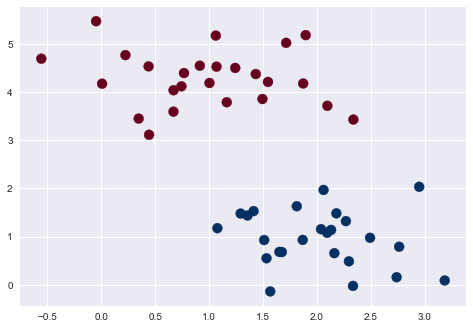

In [113]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 50,  centers = 2, random_state = 0, cluster_std = 0.6)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 100, cmap='RdBu')

In [114]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0])

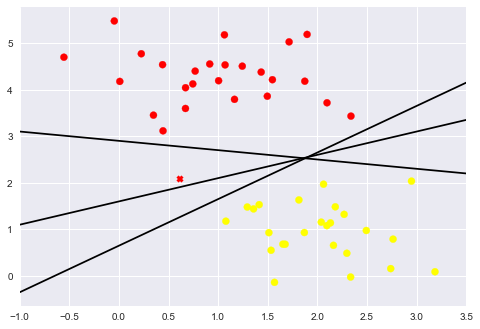

In [115]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=3, markersize=5)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

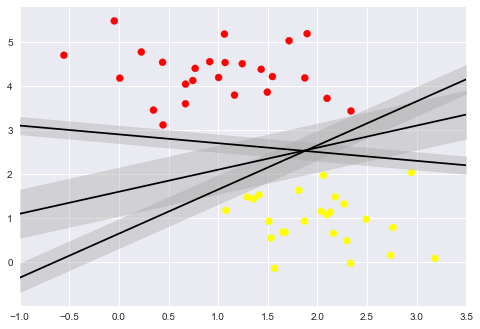

In [116]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
    
plt.xlim(-1, 3.5);

In [178]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

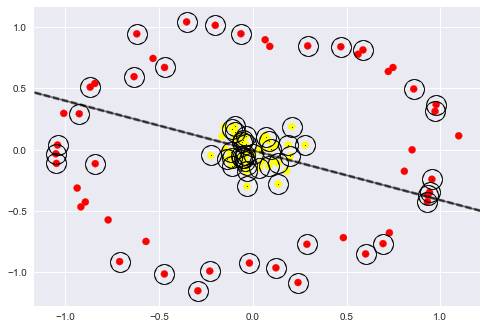

In [179]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=1, linewidth=20, facecolors='k');
    
    #print(model.support_vectors_)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [119]:
xlim, ylim

((-0.966590832319975, 3.5962249610326538),
 (-0.97088657021572222, 3.6005206989284004))

In [120]:
Y.shape
X.shape

(50, 2)

In [76]:
Y[:2]

array([[-0.43660962, -0.22249355, -0.00837749,  0.20573858,  0.41985464,
         0.63397071,  0.84808677,  1.06220284,  1.27631891,  1.49043497,
         1.70455104,  1.9186671 ,  2.13278317,  2.34689923,  2.5610153 ,
         2.77513136,  2.98924743,  3.2033635 ,  3.41747956,  3.63159563,
         3.84571169,  4.05982776,  4.27394382,  4.48805989,  4.70217595,
         4.91629202,  5.13040809,  5.34452415,  5.55864022,  5.77275628],
       [-0.43660962, -0.22249355, -0.00837749,  0.20573858,  0.41985464,
         0.63397071,  0.84808677,  1.06220284,  1.27631891,  1.49043497,
         1.70455104,  1.9186671 ,  2.13278317,  2.34689923,  2.5610153 ,
         2.77513136,  2.98924743,  3.2033635 ,  3.41747956,  3.63159563,
         3.84571169,  4.05982776,  4.27394382,  4.48805989,  4.70217595,
         4.91629202,  5.13040809,  5.34452415,  5.55864022,  5.77275628]])

In [81]:
X[:2]

array([[-0.75417405, -0.75417405, -0.75417405, -0.75417405, -0.75417405,
        -0.75417405, -0.75417405, -0.75417405, -0.75417405, -0.75417405,
        -0.75417405, -0.75417405, -0.75417405, -0.75417405, -0.75417405,
        -0.75417405, -0.75417405, -0.75417405, -0.75417405, -0.75417405,
        -0.75417405, -0.75417405, -0.75417405, -0.75417405, -0.75417405,
        -0.75417405, -0.75417405, -0.75417405, -0.75417405, -0.75417405],
       [-0.61148501, -0.61148501, -0.61148501, -0.61148501, -0.61148501,
        -0.61148501, -0.61148501, -0.61148501, -0.61148501, -0.61148501,
        -0.61148501, -0.61148501, -0.61148501, -0.61148501, -0.61148501,
        -0.61148501, -0.61148501, -0.61148501, -0.61148501, -0.61148501,
        -0.61148501, -0.61148501, -0.61148501, -0.61148501, -0.61148501,
        -0.61148501, -0.61148501, -0.61148501, -0.61148501, -0.61148501]])

In [77]:
X.ravel().shape

(900,)

In [80]:
Y.ravel().shape

(900,)

In [84]:
np.vstack([X.ravel(), Y.ravel()]).shape

(2, 900)

In [87]:
xy.shape

(900, 2)

In [147]:
xg = np.linspace(xlim[0], xlim[1], 30)
yg = np.linspace(ylim[0], ylim[1], 30)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P = model.decision_function(xy).reshape(Xg.shape)
P.shape

(30, 30)

[[ 0.44359863  3.11530945]
 [ 1.25566754  3.38204112]
 [ 0.83685684  2.13635938]]


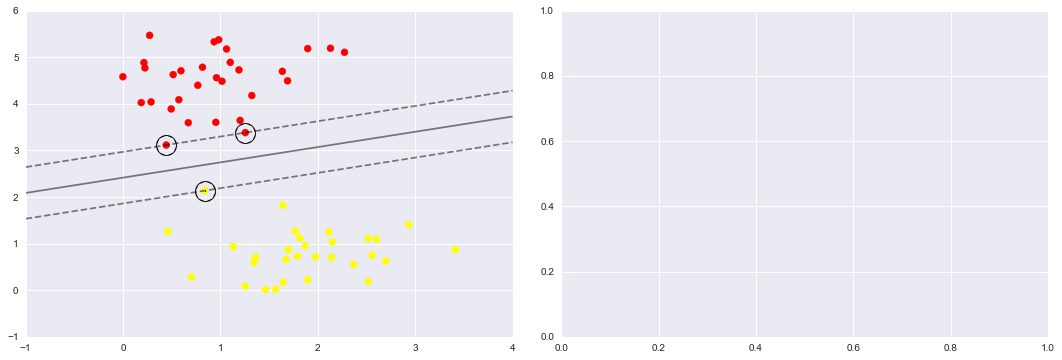

[[ 0.44359863  3.11530945]
 [ 1.25566754  3.38204112]
 [ 0.83685684  2.13635938]]


In [167]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    plt.show()
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


In [150]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC5CEED6A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001BC5CD0DB70>], dtype=object)

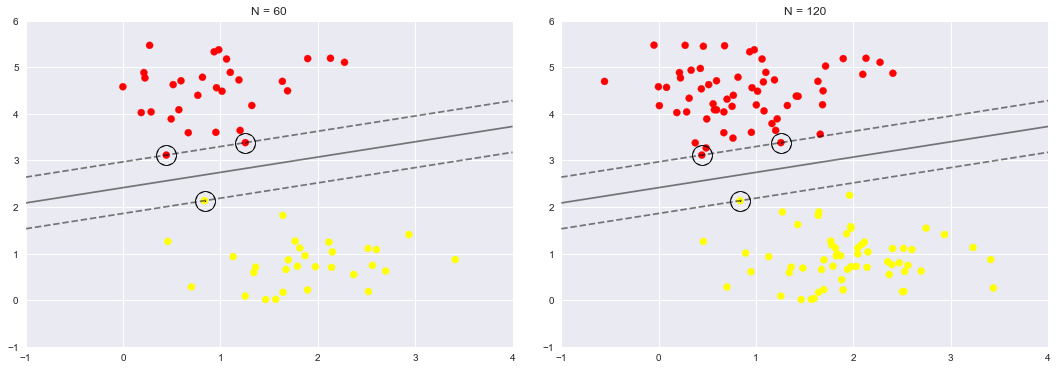

In [151]:
fig

In [169]:
from ipywidgets import interact, fixed
interact(plot_svm, N=range(10,1200,100), ax=fixed(None))


<function __main__.plot_svm>

In [174]:
ax = None
@interact(N=(10,120,10))
def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    plt.show()


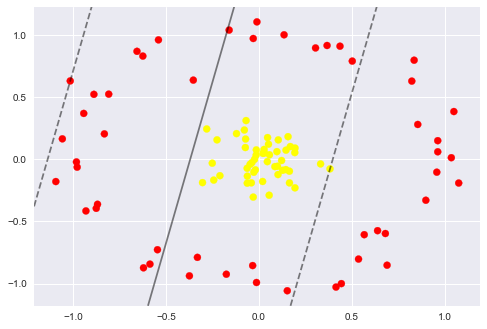

In [186]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [187]:
r = np.exp(-(X ** 2).sum(1))

In [203]:
X.shape

(100, 2)

In [191]:
y[:10].shape

(10,)

In [202]:
len(-(X ** 2).sum(1))

100

In [204]:
r.shape

(100,)

In [208]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

interact(plot_3D, elev=(-90, 90), azip=(-180, 180),X=fixed(X), y=fixed(y));

C:\Users\Gebruiker\Anaconda3\lib\site-packages\traitlets\traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)
